# Intro to PyTorch

[<img src="https://img.shields.io/badge/Status-Progress-blue.svg?logo=LOGO">](<LINK>)

In this notebook we are going to learn the basic concepts of Pytorch. Pytorch is the most used framework for Deep Learning Research. It's weel enstablished and has a huge developer community.

Alternative frameworks to Pytorch are:

- Tensorflow
- JAX
- Caffe

Tensorflow in particular is the most common alternative to Pytorch and it's know for being a more production ready deep learning library

*This notebook is inspired by the [UVA Deep Learning Course](https://uvadlc-notebooks.readthedocs.io/en/latest/index.html)*

<a id='content'></a>

**Contents**

* Import section
* PyTorch Basics
   * Tensors
       * Tensor Operations
       * Indexing
       
* Dynamic Computational Graph and Backpropagation
   

---
# Import section

In [3]:
import numpy as np
import torch

import matplotlib.pyplot as plt

---
# PyTorch Basics

In this section we will see the basic concepts of PyTorch

We already imported PyTorch in the previous section, lets check the version of the library:

In [5]:
torch.__version__

'2.0.1+cu117'

Like in numpy PyTorch offers the possibility to set a random seed to ensure that the results of different runs of the same code will give the exact same random numbers

In [6]:
torch.manual_seed(24061) # Setting the seed for reproducibility

## Tensors

Tensors are a generalization of the concept of vectors:

* `Vector: 1-D Tensor`
* `Matrix 2-D Tensor`

PyTorch tensors are the equivalent to Numpy arrays, with the difference that the former have a support for GPU acceleration.

Most of the common functions from numpy can be used on PyTorch tensors

Let's start by defining a tensor

In [ ]:
x = torch.Tensor(2,3,4) # 2, 3, 4 Represents the shape of the tensor

print(f"Data type: {type(x)} \nTensor: {x}")


Data type: <class 'torch.Tensor'> 
Tensor: tensor([[[ 3.1960e-34,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 3.5293e-34,  0.0000e+00,  3.1495e-35,  0.0000e+00],
         [-1.3519e-38,  4.5755e-41,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00]]])


`torch.Tensor` return a random tensor with the desired shape 

To directly assign numbers it's possible to use one of the following methods:
- `torch.zeros`: Creates a tensor filled with zeros
- `torch.ones`: Creates a tensor filled with ones
- `torch.rand`: Creates a tensor with random values uniformly samples between 0 and 1
- `torch.randn`: Creates a tensor with random values sampled from a normal distribution
- `torch.arange`: Creates a tensor with the values from a lower limit to an upper limit
- `torch.Tensor` + Input list: Creates a tensor with the elements in the list
- `torch.from_numpy`: Converts a numpy array into a PyTorch tensor

As an example it's possible to define a Tensor from a nested list

In [11]:
x = torch.tensor([[1,2],[3,4]])
print(x)

tensor([[1, 2],
        [3, 4]])


To access the shape of a tensor you can use two methods:
- `.shape`
- `.size`

In [14]:
shape = x.shape
size = x.size()
print(f"Tensor shape: {shape}")
print(f"Tensor size: {size}")

Tensor shape: torch.Size([2, 2])
Tensor size: torch.Size([2, 2])


### Tensor Operations

In PyTorch we have most of the operations implemented in the numpy library.

`Addition`

In [19]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)

y = x1 + x2

# x1 + x2 creates a new tensor containing the sum of the two inputs

print("x1", x1)
print("x2", x2)
print("y", y)

print("\n#### Inplace Operation\n")
# We can use in-place operations
x1 = torch.rand(2,3)
x2 = torch.rand(2,3) 

print("x1 before", x1)
print("x2 before", x2)

x2.add_(x1) # the final _ in add_ means that we are using a in-place operation

print("x1 after", x1)
print("x2 after", x2)


x1 tensor([[0.9586, 0.3951, 0.5340],
        [0.1267, 0.3693, 0.3151]])
x2 tensor([[0.1652, 0.4793, 0.0563],
        [0.2618, 0.7070, 0.6814]])
y tensor([[1.1239, 0.8744, 0.5903],
        [0.3884, 1.0764, 0.9964]])

#### Inplace Operation

x1 before tensor([[0.5925, 0.0574, 0.4906],
        [0.4131, 0.8776, 0.1413]])
x2 before tensor([[0.2616, 0.8005, 0.7499],
        [0.4120, 0.9679, 0.7110]])
x1 after tensor([[0.5925, 0.0574, 0.4906],
        [0.4131, 0.8776, 0.1413]])
x2 after tensor([[0.8540, 0.8579, 1.2405],
        [0.8251, 1.8455, 0.8523]])


The `View` operation changes the shape of a tensor

In [8]:
x = torch.arange(6)
print(f"tensor: {x}, shape: {x.shape}")

x = x.view(2,3) # Changing the shape of x into a 2x3 tensor
print(f"tensor: {x}, shape: {x.shape}")


tensor: tensor([0, 1, 2, 3, 4, 5]), shape: torch.Size([6])
tensor: tensor([[0, 1, 2],
        [3, 4, 5]]), shape: torch.Size([2, 3])


The `Permute` operation swaps the dimensions of the tensor

In [10]:
x = torch.arange(6)
print(f"tensor: {x}, shape: {x.shape}")

x = x.view(2,3) # Changing the shape of x into a 2x3 tensor
print(f"tensor: {x}, shape: {x.shape}")

x = x.permute(1,0) # CSwapping the dimensions of the tensor
print(f"tensor: {x}, shape: {x.shape}")

tensor: tensor([0, 1, 2, 3, 4, 5]), shape: torch.Size([6])
tensor: tensor([[0, 1, 2],
        [3, 4, 5]]), shape: torch.Size([2, 3])
tensor: tensor([[0, 3],
        [1, 4],
        [2, 5]]), shape: torch.Size([3, 2])


-

Matrix multiplication are the essence of neural networks, where we have to multiply tensors with input data $x$ with other tensors representing the learned weights of the model $W$.

There are multiple ways to perform matrix multiplication in PyTorch:
* `torch.matmul`: Performs matrix multiplication over two tensors. If both inputs are matrices it performs the standard matrix product. For higher dimensional inputs the function support broadcasting
* `torch.mm`: Performs the matrix product over two matrices but doesn't support broadcasting
* `torch.bmm`: Performs the matrix multiplication with the support of a batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$.

In [14]:
x = torch.arange(6) # Defining the input vector
x = x.view(2,3) # Changing the shape of the x tensor
print("x: ", x)

W = torch.arange(9)\
         .view(3,3) # Defining the weight vector and changing its shape into a 3x3 tensor

print("W: ", W)

h = torch.matmul(x,W) # Performing the multiplication between the input vector and the weight tensor
print("h: ", h)





x:  tensor([[0, 1, 2],
        [3, 4, 5]])
W:  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h:  tensor([[15, 18, 21],
        [42, 54, 66]])


### Indexing

Like in numpy we can select parts of the tensor

In [17]:
x = torch.arange(12).view(3,4)

print(x[:, 1]) # Second column
print(x[0]) # First row

print(x[:2, -1]) # First 2 rows and last column
print(x[1:3, :]) # Middle two rows

tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# Dynamic Computational Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables; in that case we talk about **gradients**.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

*Description taken from [UVA Deep Learning Course](https://uvadlc-notebooks.readthedocs.io/en/latest/index.html)*

When we define a tensor in PyTorch by default it does not requires gradient

In [20]:
x = torch.ones((3,))
print(x.requires_grad)

False


There are two options to change the requires_grad property to true:

In [24]:
x.requires_grad_(True) # Setting the property to true after the initialization
print(x.requires_grad)

x = torch.ones((3,), requires_grad = True)
print(x.requires_grad)

True
True


We can compute the gradient of a function by hand and than compare the result with PyTorch. Let's consider the function:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

$\mathbf{x}$ are the parameters. We want to optimize them in order int maximize/minimize the output $\mathbf{y}$.
We need to optain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [31]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [32]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


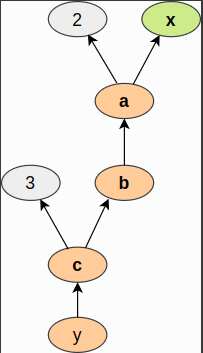

The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [33]:
y.backward()
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.